In [51]:
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics

import plotly.graph_objs as go
import plotly
import cufflinks
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn import linear_model
import tkinter as tk 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [52]:
# Read data from file 'brent-oil-historical-data-2020-05-15-18-19-10.csv' 
df = pd.read_csv("Brent Oil Futures Historical Data-Monthly-2010-2020.csv") 
print(df.shape)

(125, 7)


In [53]:
# Preview the first 5 observations
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-05-01,35.55,26.98,36.98,25.50,28.96K,83.91%
1,2020-04-01,19.33,26.00,36.40,15.98,637.21K,-15.00%
2,2020-03-01,22.74,48.95,53.90,21.65,7.36M,-54.99%
3,2020-02-01,50.52,56.16,60.00,50.05,5.27M,-13.14%
4,2020-01-01,58.16,66.41,71.75,57.71,5.80M,-11.88%


In [54]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [55]:
# Sort the rows of dataframe by column 'Date' in descending order
df = df.sort_values(by ='Date' , ascending=True)
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
124,2010-01-01,71.46,78.49,82.45,71.02,2.81M,-8.30%
123,2010-02-01,77.59,71.35,78.94,67.87,3.29M,8.58%
122,2010-03-01,82.70,77.69,82.82,76.21,3.38M,6.59%
121,2010-04-01,87.44,82.44,87.75,82.22,3.12M,5.73%
120,2010-05-01,74.65,87.44,89.58,68.15,3.47M,-14.63%


In [56]:
df.describe(include=[np.number])

,Price,Open,High,Low
count,125.000000,125.000000,125.000000,125.000000
mean,78.555200,78.865680,83.287120,73.646960
std,26.689972,26.247794,26.522807,26.187375
min,19.330000,26.000000,36.400000,15.980000
25%,55.700000,56.450000,61.410000,51.990000
50%,74.640000,74.650000,78.940000,69.780000
75%,107.700000,107.810000,111.660000,101.660000
max,125.890000,126.100000,128.400000,120.970000


In [57]:
df.describe(include=[np.object])

,Date,Vol.,Change %
count,125,125,125
unique,125,107,124
top,2014-10-01,3.76M,10.28%
freq,1,3,2


In [60]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [61]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().mean()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Change %,0,0.0
Vol.,0,0.0
Low,0,0.0
High,0,0.0
Open,0,0.0
Price,0,0.0
Date,0,0.0


Question 3

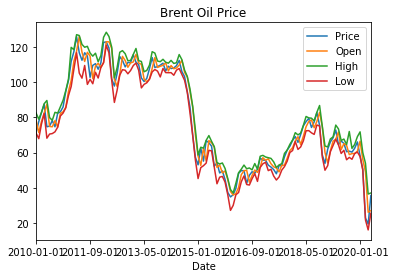

In [62]:
df.plot.line(x="Date", title="Brent Oil Price");

In [63]:
# Drop the Open, High,Low column which is not in use for analysis
new_df = df.drop(['Open','High', 'Low'], axis =1)
new_df.columns = ['Date','Price','Vol', 'Change']
new_df.head()

,Date,Price,Vol,Change
124,2010-01-01,71.46,2.81M,-8.30%
123,2010-02-01,77.59,3.29M,8.58%
122,2010-03-01,82.70,3.38M,6.59%
121,2010-04-01,87.44,3.12M,5.73%
120,2010-05-01,74.65,3.47M,-14.63%


In [64]:
#change - to 0
for index in range(0,len(new_df)): 
    if(new_df.at[index,'Vol'] == '-'):
        new_df.at[index,'Vol'] = 0
    #print(new_df.at[index,'Vol'])
        
    if (new_df.at[index,'Change'] == '-'):
        new_df.at[index,'Change'] = 0
    #print(new_df.at[index,'Change'])
    
    if(new_df.at[index,'Vol'] != 0):
        new_df.at[index,'Vol'] = new_df.at[index,'Vol'][:-1]
        #print(new_df.at[index,'Vol'])
        
    if(new_df.at[index,'Change'] != 0):
        new_df.at[index,'Change'] = new_df.at[index,'Change'][:-1]
        #print(new_df.at[index,'Change'])
        
new_df.head()

,Date,Price,Vol,Change
124,2010-01-01,71.46,2.81,-8.30
123,2010-02-01,77.59,3.29,8.58
122,2010-03-01,82.70,3.38,6.59
121,2010-04-01,87.44,3.12,5.73
120,2010-05-01,74.65,3.47,-14.63


In [65]:
#change 'Change' to float64 if want to plot a bar
new_df['Change'] = new_df['Change'].astype(np.float64)
new_df['Vol'] = new_df['Vol'].astype(np.float64)
new_df.dtypes

Date       object
Price     float64
Vol       float64
Change    float64
dtype: object

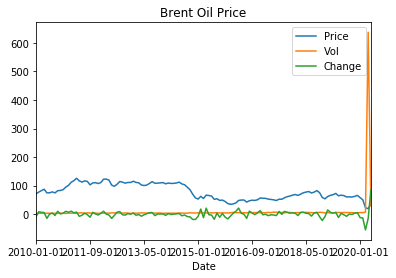

In [66]:
new_df.plot.line(x="Date", title="Brent Oil Price");

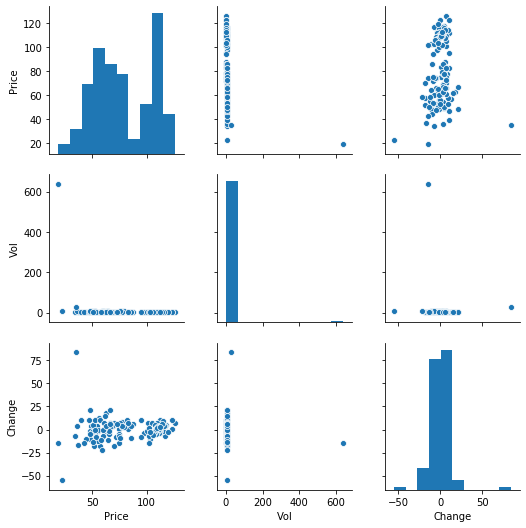

In [67]:
sns.pairplot(new_df)

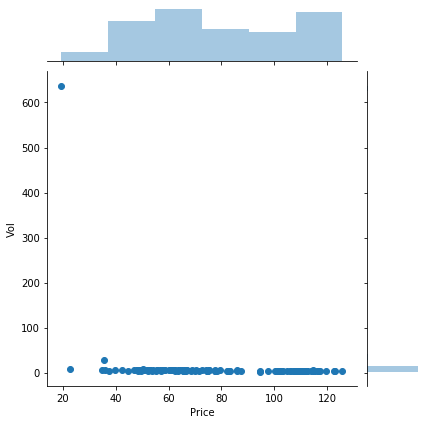

In [68]:
sns.jointplot(x='Price',y='Vol',data=new_df)

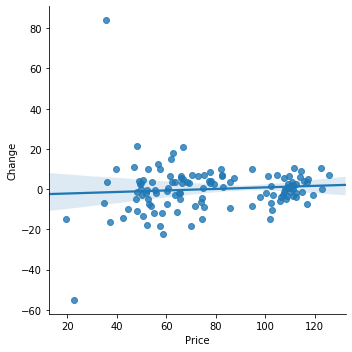

In [69]:
sns.lmplot(x='Price',y='Change',data=new_df)

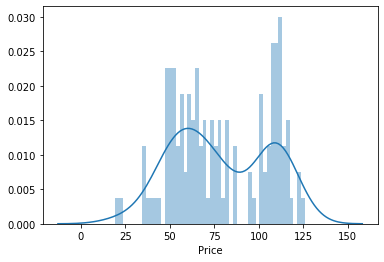

In [70]:
x=new_df['Price']
sns.distplot(x,bins=50)

In [71]:
Price= go.Bar(x=new_df['Date'],y=new_df['Price'],name='Price',marker= dict(color='red'))
Vol = go.Bar(x=new_df['Date'],y=new_df['Vol'],name='Vol',marker= dict(color='blue'))
Change = go.Bar(x=new_df['Date'],y=new_df['Change'],name='Change %',marker= dict(color='green'))
data=[Price, Change, Vol]
#data = [Price]
layout = go.Layout(barmode = "group", title='Price vs Vol vs Change for Brent Oil ',)
fig = go.Figure(data = data, layout = layout)
plotly.offline.iplot(fig)

## Modeling

### Linear Regression

In [72]:
# Traiing and testing data
X1 = new_df[['Vol','Change']].astype(float) # here we have 2 input variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
y1 = new_df['Price'].astype(float) # output variable (what we are trying to predict)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=101)

In [73]:
X_train1.shape

(87, 2)

In [74]:
X_test1.shape

(38, 2)

In [75]:
lm = LinearRegression()
lm.fit(X_train1,y_train1) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
#To retrieve the intercept:
print(lm.intercept_)
#For retrieving the slope:
print(lm.coef_)

77.47324708935156
[-0.09658615  0.05953137]


In [77]:
predictions1 = lm.predict(X_test1)

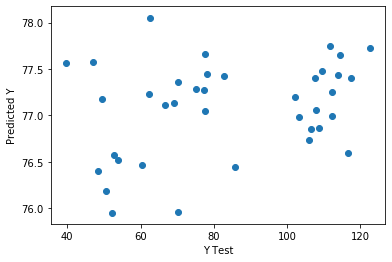

In [78]:
plt.scatter(y_test1,predictions1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

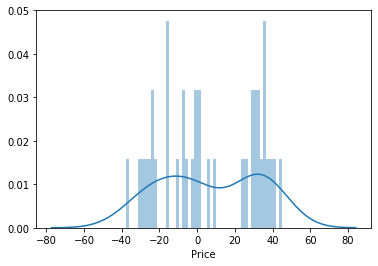

In [79]:
sns.distplot((y_test1-predictions1),bins=50)

In [80]:
new_df['prediction'] = new_df['Price'].shift(-1)
new_df.dropna(inplace=True)
forecast_time = int(1200)
print(forecast_time)

1200


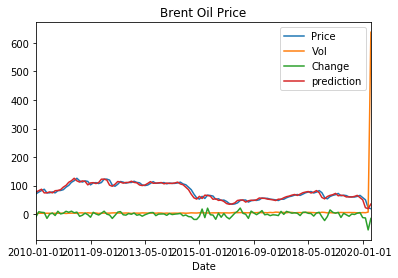

In [81]:
#can see the relationship between price, transaction vol clearly after clean/transform the data
#transaction volumn is high when the percentage of price drop is high (on 2020-04-21)
new_df.plot.line(x="Date", title="Brent Oil Price");

In [82]:
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 300)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', lm.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', lm.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Vol: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Change: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)

def values(): 
    global New_Vol #our 1st input variable
    New_Vol = float(entry1.get()) 
    
    global New_Changes #our 2nd input variable
    New_Changes = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Brent Oil Price: ', lm.predict([[New_Vol ,New_Changes]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Brent Oil Price',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 
#plot 1st scatter 
figure3 = plt.Figure(figsize=(5,4), dpi=100)
ax3 = figure3.add_subplot(111)
ax3.scatter(new_df['Vol'].astype(float),new_df['Price'].astype(float), color = 'r')
scatter3 = FigureCanvasTkAgg(figure3, root) 
scatter3.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax3.legend(['Price']) 
ax3.set_xlabel('Vol')
ax3.set_title('Vol Vs. Price')

#plot 2nd scatter 
figure4 = plt.Figure(figsize=(5,4), dpi=100)
ax4 = figure4.add_subplot(111)
ax4.scatter(new_df['Change'].astype(float),new_df['Price'].astype(float), color = 'g')
scatter4 = FigureCanvasTkAgg(figure4, root) 
scatter4.get_tk_widget().pack(side=tk.RIGHT, fill=tk.BOTH)
ax4.legend(['Price']) 
ax4.set_xlabel('Change')
ax4.set_title('Change Vs. Price')

root.mainloop()